In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
pd.set_option('display.max_columns', 10)
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col = 0)
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,...,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,...,0,0,ME,3,23


In [79]:
#PCA requires continuous numerical variables
#For this I will try to reduce the dimensionality of current numerical variables
#In particular my goal is to identify and select which income variable to use as there is likely
#substantial correlation between all of them
#The same applies to medical costs and whether
#before or after insurance is applied matters
#This also rids the data of any potential labels
int_columns = ['age', 
            'fam_size', 
            'weekly_earnings', 
            'hours_worked', 
            'weeks_unemployed', 
            'federal_gross_income_adj',
            'hh_childcare_val',
            'family_earn_ly', 
            'fam_med_costs', 
            'fam_outofpocket_med_costs', 
            'fam_otc_med_costs', 
            'fam_rent_val',
            'poverty_ratio'    #For later Classification i.e. our label
]
PCA_df_net = data.filter(int_columns)
PCA_df_net = PCA_df_net.loc[PCA_df_net['poverty_ratio'] != 'NOT IN POVERTY UNIVERSE']
PCA_df = PCA_df_net.copy()
PCA_df = PCA_df.drop('poverty_ratio', axis = 1)
PCA_df.head()

,age,fam_size,weekly_earnings,hours_worked,weeks_unemployed,...,family_earn_ly,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val
1,67,0,0,0,0,...,0,0,0,0,0
2,74,0,0,0,0,...,0,0,60,60,0
3,66,1,0,0,0,...,0,0,0,0,0
4,68,1,0,0,0,...,0,0,0,0,0
5,52,1,0,0,0,...,42000,50,1370,0,0


In [ ]:
PCA_label = PCA_df['poverty_ratio']


In [31]:
PCA_features =  ['age', 
            'fam_size', 
            'weekly_earnings', 
            'hours_worked', 
            'weeks_unemployed', 
            'federal_gross_income_adj',
            'hh_childcare_val',
            'family_earn_ly', 
            'fam_med_costs', 
            'fam_outofpocket_med_costs', 
            'fam_otc_med_costs', 
            'fam_rent_val',
]

In [32]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(PCA_df)
PCA_df_scaled = scaler.transform(PCA_df)

In [33]:
PCA_df_scaled

array([[ 1.210869  , -1.96015953, -0.22593967, ..., -0.65177087,
        -0.36326215, -0.07994582],
       [ 1.51134432, -1.96015953, -0.22593967, ..., -0.64415579,
        -0.31844028, -0.07994582],
       [ 1.16794395,  0.29109599, -0.22593967, ..., -0.65177087,
        -0.36326215, -0.07994582],
       ...,
       [ 0.86746863,  0.29109599, -0.22593967, ...,  0.23030913,
        -0.02709814, -0.07994582],
       [ 0.91039368,  0.29109599, -0.22593967, ...,  0.23030913,
        -0.02709814, -0.07994582],
       [-0.89245826,  0.29109599, -0.22593967, ...,  0.23030913,
        -0.02709814, -0.07994582]])

In [34]:
#Begin PCA for 2 components
from sklearn.decomposition import PCA
PCA_2 = PCA(n_components=2)
PCA_2_fitted =PCA_2.fit_transform(PCA_df_scaled)
PCA_2_fitted


array([[-1.71236541, -0.58458036],
       [-1.70612418, -0.68308231],
       [-1.36836695,  0.14854481],
       ...,
       [ 0.85178933, -0.93968135],
       [ 0.46959326, -0.36792762],
       [ 0.36737637,  0.72269002]])

In [81]:
PCA_2_scaled_df = pd.DataFrame(PCA_df_scaled, columns=PCA_features)
PCA_2_scaled_df.head()

,age,fam_size,weekly_earnings,hours_worked,weeks_unemployed,...,family_earn_ly,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val
0,1.210869,-1.960160,-0.22594,-0.831263,-0.078909,...,-0.746156,-0.479016,-0.651771,-0.363262,-0.079946
1,1.511344,-1.960160,-0.22594,-0.831263,-0.078909,...,-0.746156,-0.479016,-0.644156,-0.318440,-0.079946
2,1.167944,0.291096,-0.22594,-0.831263,-0.078909,...,-0.746156,-0.479016,-0.651771,-0.363262,-0.079946
3,1.253794,0.291096,-0.22594,-0.831263,-0.078909,...,-0.746156,-0.479016,-0.651771,-0.363262,-0.079946
4,0.566993,0.291096,-0.22594,-0.831263,-0.078909,...,-0.422803,-0.466527,-0.477893,-0.363262,-0.079946


In [36]:
print(PCA_2.explained_variance_ratio_)


[0.1767472  0.13831894]


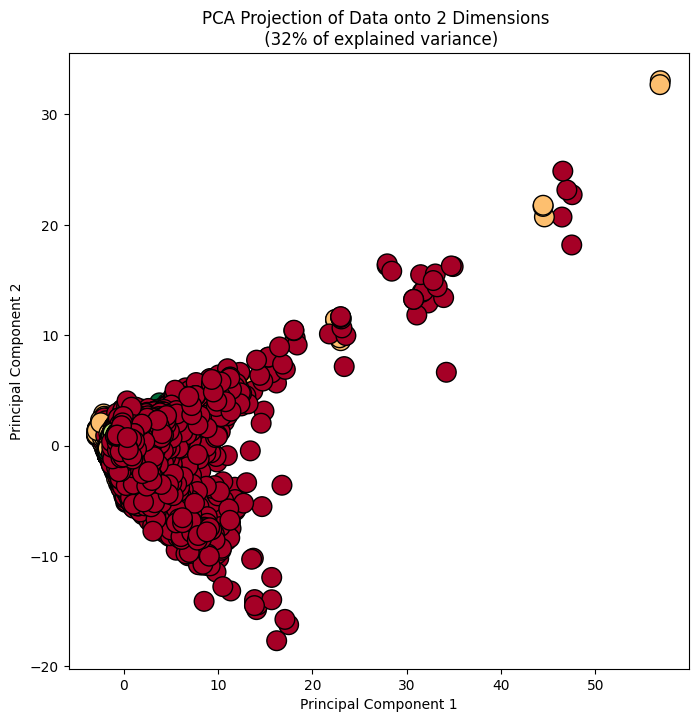

In [72]:
#Vizualize the 2D PCA
Label=PCA_df_net["poverty_ratio"]
Label_map={"150 AND ABOVE THE POVERTY LEVEL":0, 
       "BELOW POVERTY LEVEL":1, 
       "125 - 149 PERCENT OF THE POVERTY LEVEL":2, 
       "100 - 124 PERCENT OF THE POVERTY LEVEL":3
}
remapped_labels = Label.map(Label_map)  
fig2 = plt.figure(figsize=(8, 8))

x=PCA_2_fitted[:,0]
y=PCA_2_fitted[:,1] 

plt.scatter(x,y, cmap="RdYlGn", edgecolor='k', s=200, c=remapped_labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Data onto 2 Dimensions \n (32% of explained variance)")

plt.savefig('../site_pages/plots/two_component_pca.png')
plt.show()

In [52]:
#Begin PCA for 3 components
from sklearn.decomposition import PCA
PCA_3 = PCA(n_components=3)
PCA_3_fitted =PCA_3.fit_transform(PCA_df_scaled)
PCA_3_fitted

array([[-1.71236541, -0.58458036,  1.40134276],
       [-1.70612418, -0.68308231,  1.57272821],
       [-1.36836695,  0.14854481,  0.57632223],
       ...,
       [ 0.85178933, -0.93968135,  0.44410206],
       [ 0.46959326, -0.36792762,  0.64775489],
       [ 0.36737637,  0.72269002, -0.29096625]])

In [54]:
print(PCA_3.explained_variance_ratio_)


[0.1767472  0.13831894 0.11159337]


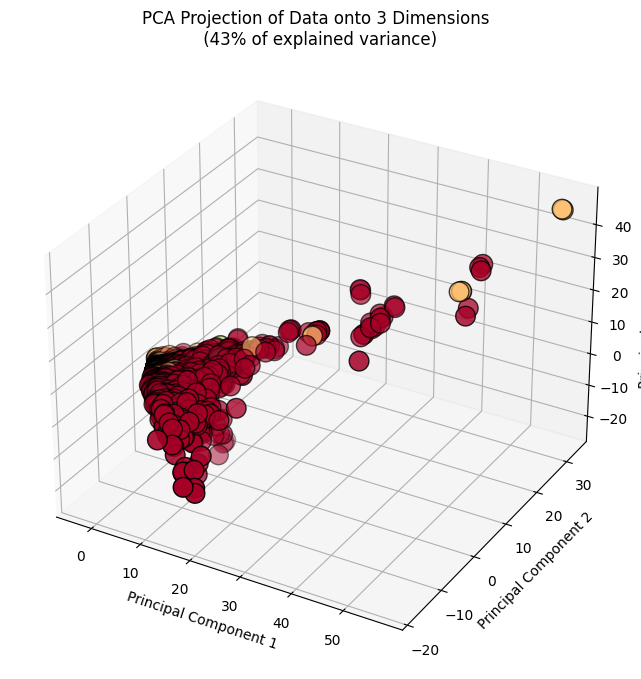

In [74]:
fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(projection='3d')


x=PCA_3_fitted[:,0]
y=PCA_3_fitted[:,1] 
z=PCA_3_fitted[:,2] 


ax3.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200, c=remapped_labels)
ax3.set_xlabel("Principal Component 1")
ax3.set_ylabel("Principal Component 2")
ax3.set_zlabel("Principal Component 3")

plt.title("PCA Projection of Data onto 3 Dimensions \n (43% of explained variance)")
plt.savefig('../site_pages/plots/three_component_pca.png')
plt.show()

In [87]:
PCA_dataset_for_clustering = pd.DataFrame({
    'principal_component1' : PCA_3_fitted[:,0],
    'principal_component2' : PCA_3_fitted[:,1],
    'principal_component3' : PCA_3_fitted[:,2]
})
PCA_dataset_for_clustering['poverty_ratio'] = PCA_df_net['poverty_ratio']
PCA_dataset_for_clustering.to_csv('../data/clean_data/PCA_dataset_for_clustering.csv')


In [20]:
net_PCA = PCA()
net_PCA_scaled = net_PCA.fit_transform(PCA_df_scaled)
explained_variance = net_PCA.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(cumulative_variance))],
    'Cumulative Variance': cumulative_variance
})
cumulative_variance_df

,Principal Component,Cumulative Variance
0,PC1,0.176995
1,PC2,0.315103
2,PC3,0.426452
3,PC4,0.513234
4,PC5,0.596199
5,PC6,0.673469
6,PC7,0.747989
7,PC8,0.817793
8,PC9,0.880117
9,PC10,0.936309


In [77]:
explained_variance = net_PCA.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'EigenValues': explained_variance
})
explained_variance_df [:3]

,Principal Component,EigenValues
0,PC1,0.176995
1,PC2,0.138108
2,PC3,0.111349
